# Market Basket Optimization Using Apriori (Associate Rule Learning)

### Our main goal is to find out which 2 items are often bought together in a Market Basket eg:Milk, eggs etc

### The Apriori Algorithm Mainly focusses on three main terms:

**1.Support: Support is the percentage of total transactions that the item set {eg:milk, eggs} appears in. Support= Transations containing the itemset/Total Transactions.**

**2.Confidence: Tells you whenever someone buys something, How reliable is the rule that they buy the other item in the itemset as well. Confidence= Support(itemset)/Support(core item in the itemset)**

**3.Lift: This is probably the most important metric in the Apriori Algorithm. The lift tells you if it is a genuine association or just coincidence.**

Lift > 1 (Positive Correlation): This means the items are bought together more often than by random chance. This is a genuine and useful association.

Lift = 1 (No Correlation): This means the items are independent. Buying the 'if' item has no effect on the likelihood of buying the 'then' item.

Lift < 1 (Negative Correlation): This means the items are bought together less often than random chance. Buying one item actually makes it less likely the other will be bought (e.g., they are substitutes).

## Importing the required libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
import networkx as nx

In [2]:
df=pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


## Appending Market Basket Items to a list for each customer, 20 columns, 7500 rows

In [4]:
transactions = []
for i in range(0, 7501):
    transaction_items = []  
    for j in range(0, 20):
        item = str(df.values[i, j])
        
        if item != 'nan':
            transaction_items.append(item)
    transactions.append(transaction_items)

In [5]:
print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

## Applying the Apriori Associate Rule learning algorithm to our list(transactions)

### We add all our minimum parameters as we want the most frequently bought items in a pair of 2

In [6]:
rules=apriori(transactions=transactions,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2,max_length=2)

In [7]:
results=list(rules)
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

## Visualizing the Rules

In [8]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])


In [9]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


## Grouping the results by max lift

In [10]:
resultsinDataFrame.nlargest(n=10,columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


## Analysis of Top 10 Rules by Lift

**This table shows the Top 10 strongest and most actionable association rules found in the dataset, sorted by "Lift." A high Lift (anything > 1) indicates a strong positive correlation, meaning the items are bought together far more often than by random chance.**

### Here are the key insights from the top 3 rules:

**Rule 1 (Row 3): {fromage blanc} -> {honey}**

This is the strongest association in the entire dataset, with a Lift of 5.16.

Insight: A customer who buys fromage blanc is 5.16 times more likely to also buy honey than a random customer.

Metrics: While the Support is very low (0.33%), meaning this specific combination is rare, the Confidence is 24.5%. This tells us that when this rare purchase does happen, the rule holds true about 1 out of 4 times.

**Rule 2 (Row 0): {light cream} -> {chicken}**

This is the second-strongest rule, with a Lift of 4.84.

Insight: A customer buying light cream is 4.84 times more likely to also buy chicken. This is another non-obvious pairing that could be used for promotions.

Metrics: This combination is also rare (Support = 0.45%), but has a Confidence of 29%, making it a fairly reliable rule when the "if" condition (buying light cream) is met.

**Rule 3 (Row 2): {pasta} -> {escalope}**

This rule has a very high Lift of 4.70.

Insight: This is a classic recipe-based pairing. Customers buying pasta are 4.7 times more likely to buy escalope (a thin slice of meat).

Metrics: This rule is more reliable all-around. It has the highest Confidence (37.2%) and Support (0.58%) of the top 3, meaning it not only has a strong association but also happens more frequently.

**Overall Conclusion:**

All of the top 10 rules show a Lift value greater than 3.2, which confirms they are all statistically significant, positive correlations and not just random coincidences. These rules provide excellent, data-driven opportunities for cross-selling, such as creating targeted "bundle" promotions or strategically placing these items near each other in a store.

## Learning how to use Networkx for good visualization of Rules Developed

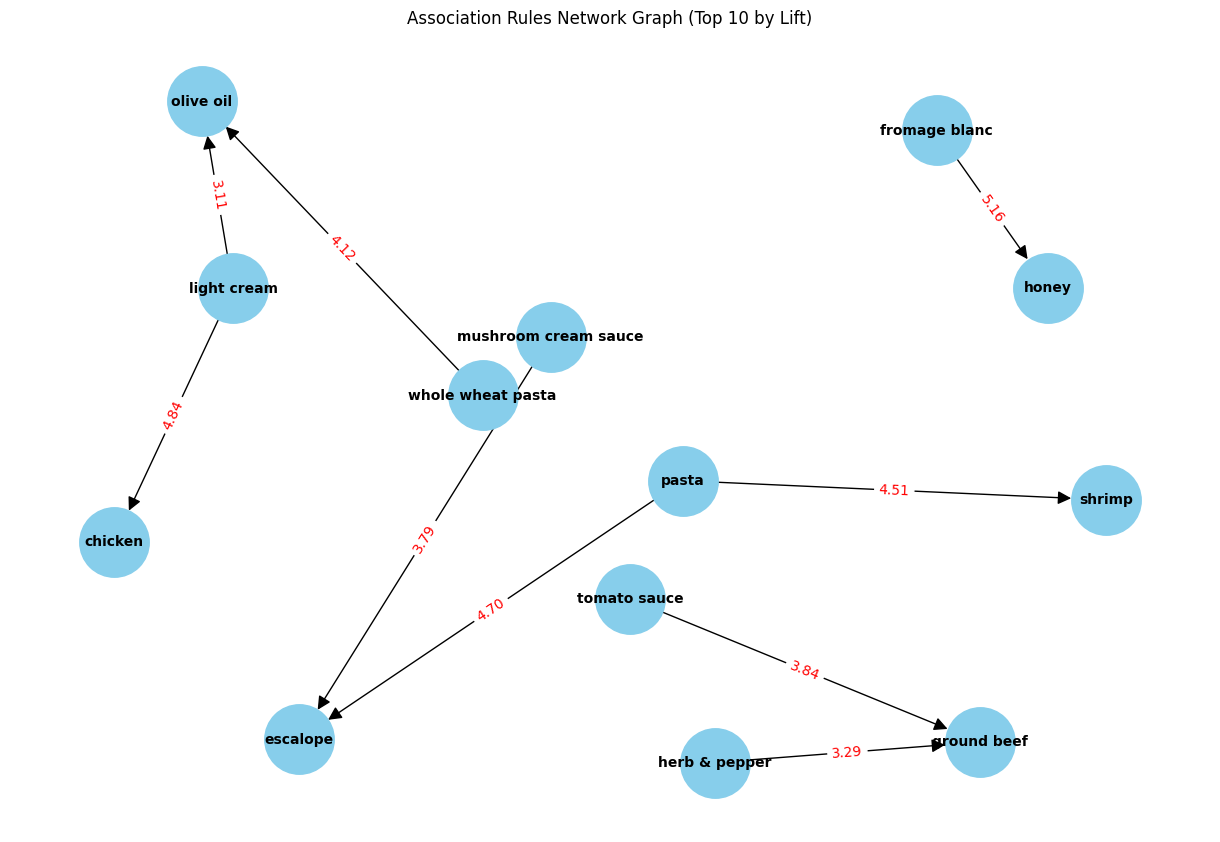

In [11]:

df_to_plot = resultsinDataFrame.nlargest(n=10, columns='Lift')
G = nx.from_pandas_edgelist(df_to_plot,source='Left Hand Side',target='Right Hand Side',edge_attr='Lift', create_using=nx.DiGraph())
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.9, iterations=50)
nx.draw(G, pos, with_labels=True,node_color='skyblue',node_size=2500,font_size=10,font_weight='bold',arrowsize=20)         

edge_labels = nx.get_edge_attributes(G, 'Lift')


formatted_edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}

nx.draw_networkx_edge_labels(G, pos,edge_labels=formatted_edge_labels,font_color='red')

plt.title("Association Rules Network Graph (Top 10 by Lift)")
plt.show()